## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 18
---------------------------------------

GOALS:

1. Practice Logistic Regression
2. Interpret Logistic Regression Results

----------------------------------------------------------


This homework has **1 Exercise** and **1 Challenge Exercise**

### Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


### Announcements

**Come to Lab!** If you need help we are here to help!

### Day 18 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day18 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day18-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [1009]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import metrics

### Data: A collection of Emails

- Emails for the first three months of 2012 for an email account
- Data from 3921 emails and 21 variables on them
- Outcome: whether the email is spam or not
- Predictors: number of characters, whether the email had "Re:" in the subject, time at which email was sent, number of times the word "inherit" shows up in the email, etc.


Data Information: https://www.openintro.org/data/index.php?data=email

This lab follows the Data Science in a Box units "Unit 4 - Deck 6: Logistic regression" by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [1012]:
file_name = 'data/email.csv'
DF = pd.read_csv(file_name)

In [1013]:
DF

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01T09:09:49Z,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01T10:00:01Z,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,2012-03-31T00:03:45Z,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,1,0,1,0,0,2012-03-31T14:13:19Z,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,0,1,1,0,0,2012-03-30T16:20:33Z,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,0,1,1,0,0,2012-03-28T16:00:49Z,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


### Exercise 1
Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

#### 1 - Exploration of 'number' field
Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.

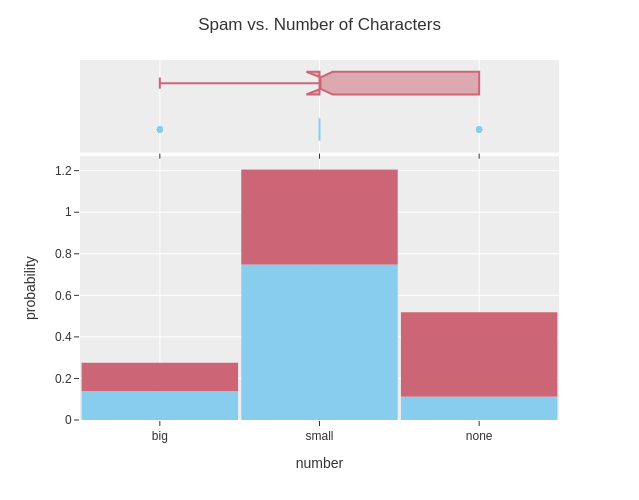

spam  number
0     small     2659
      big        495
      none       400
1     small      168
      none       149
      big         50
Name: count, dtype: int64

In [1018]:
fig = px.histogram(DF,
                   x='number',
                   color='spam',
                   nbins=50,
                   histnorm='probability',
                   marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Safe)


fig.update_layout(template="ggplot2",
                  bargap=0.02,
                  title='Spam vs. Number of Characters',
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

DF.groupby(by='spam')['number'].value_counts()

It seems as though spam emails are more likely to have at least a small number compared to non-spam emails, but that both are about equally likely to contain big numbers. That said, emails without numbers are the most likely to be spams by this metric. Which is pretty counter-intuitive to me because I assume scammers would do a lot of quoting needs for payment and such.

#### 2 - Linear Model
Create and fit a Logistic Regression model.

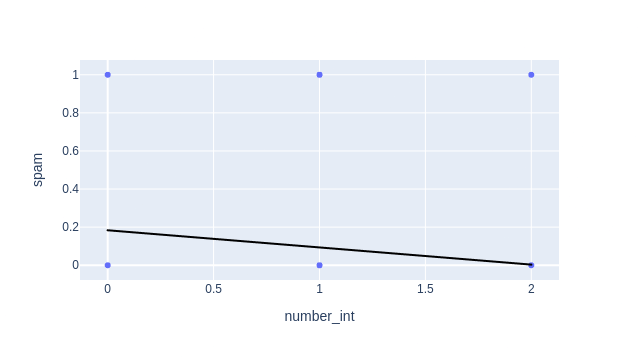

In [1022]:
# Get a subset of the rows
DF_model = DF[['number','spam']]

#remap category to int
nummaps = {'big': 2, 'small': 1, 'none': 0}
DF_model['number_int'] = DF_model['number'].map(nummaps)

# Get the variables
X = DF_model['number_int'].values.reshape(-1,1)
y = DF_model['spam']

# Do the regression
LM = LinearRegression()
LM.fit(X,y)

# Save the predicted values to the data frame
DF_model['prediction'] = LM.predict(X)

# Plot the results
fig = px.scatter(DF_model,x='number_int',y='spam')

fig.add_trace(
    px.line(DF_model, x='number_int', y='prediction',color_discrete_sequence=['black']).data[0]
)

fig.show()

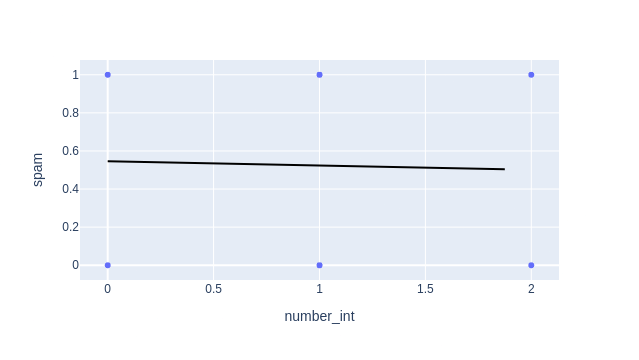

In [1023]:
intercept = LM.intercept_
slope = LM.coef_

P = []

num_characters = list(np.arange(0,2,0.125))

for num in num_characters:
    eta = intercept + slope*num
    P.append(1/(1+np.exp(-eta)[0]))


# Plot the results
fig = px.scatter(DF_model,x='number_int',y='spam',opacity=.5)

fig.add_trace(
    px.line(x=num_characters,y=P,color_discrete_sequence=['black']).data[0]
)

fig.show()

The model starts out alright with the higher probability of an email being spam if it has no numbers, but a linear model cannot handle the dip in probability in the middle. I should have split this into dummy variables.

#### 3 - Linear Model Results
Show the results: intercept, coefficient, basic confusion matrix prediction.

In [1027]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

[-0.09015171]
0.1836583163113777
0.02672864970929356


In [1029]:
# import the metrics class
from sklearn import metrics

DF_model['prediction'] = LM.predict(X)

y_pred = DF_model['prediction'].values
y_pred = [0 if yp<0.5 else 1 for yp in y_pred]

y = DF_model['spam'].astype('float').values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3554,    0],
       [ 367,    0]])

#### 4 - Confusion Matrix
What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.

The cutoff won't identify any spam emails unless it is put below 18 percent, so that is going to be the new cutoff.

In [1034]:
# import the metrics class
from sklearn import metrics

DF_model['prediction'] = LM.predict(X)

y_pred = DF_model['prediction'].values
y_pred = [0 if yp<0.18 else 1 for yp in y_pred]

y = DF_model['spam'].astype('float').values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3154,  400],
       [ 218,  149]])

#### 5 - Results
Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.

Note: I modified the variables so that a Spam is a positive, and a not-spam is a negative because that made more sense to me.

In [1038]:
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]

print('False Negative Rate:')
print(FN/ (TP+FN))
print('------')
print('False Positive Rate:')
print(FP/ (FP+TN))
print('------')
print('Sensitivity:')
print(1 - (FN/ (TP+FN)))
print('------')
print('Specificity:')
print(1- (FP/ (FP+TN)))

False Negative Rate:
0.5940054495912807
------
False Positive Rate:
0.11254924029262803
------
Sensitivity:
0.40599455040871935
------
Specificity:
0.887450759707372


About 60% of spam messages were uncaught, and about 11% of non-spam messages were labeled as spam. This means about 40% of spam messages were caught and about 89% of non-spam messages were labeled correctly.

### Exercise 2 - challenge
Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

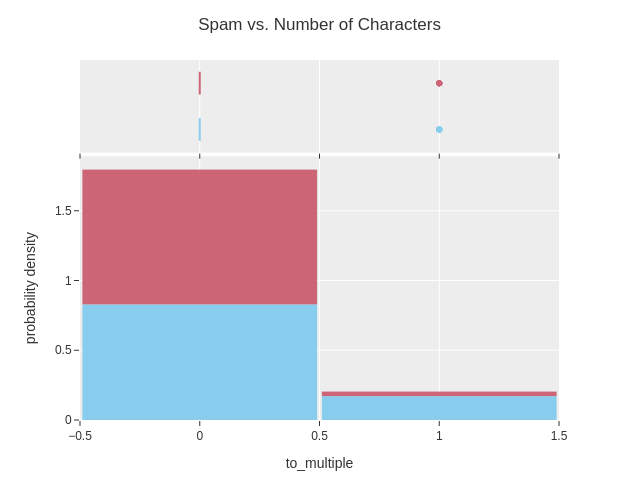

spam  to_multiple
0     0              2946
      1               608
1     0               355
      1                12
Name: count, dtype: int64

In [1042]:
target = 'to_multiple'
fig = px.histogram(DF,
                   x=target,
                   color='spam',
                   histnorm='probability density',
                   nbins=2,
                   marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Safe)


fig.update_layout(template="ggplot2",
                  bargap=0.02,
                  title='Spam vs. Number of Characters',
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

DF.groupby(by='spam')[target].value_counts()

#### Linear Model
Choices:
- number (removed): I decided number was too ambiguous to be a good predictor
- num_chars: This showed some promise in the lecture
- winner: Spammers often pretend that the targets have won something
- to_multiple: Generally spammers pretend to target one person at a time
- sent_email: If David had sent the person an email previously, he probably trusts them

Also all of these seemed to have a significant effect when looking at their bar charts.

Prep DF and desired variables

In [1046]:
#get columns
model_vars = ['spam', 'num_char', 'sent_email', 'to_multiple', 'winner']
DF_model = DF[model_vars]

#make winner a proper bool
DF_model['winner_bool'] = DF_model['winner'].apply(lambda s: 1 if s=='yes' else 0)

# remove/add vars to analysis list
xvars = model_vars
for var in ['spam', 'winner']:
    xvars.remove(var)
xvars.extend(['winner_bool'])

Make model

In [1049]:
# Get the variables
X = DF_model[xvars].values.reshape(-1,len(xvars))
y = DF_model['spam']

# Do the regression
LM = LinearRegression()
LM.fit(X,y)

# Save the predicted values to the data frame
DF_model['pred'] = LM.predict(X)

DF_model['pred_norm'] = 1/(1+np.exp(-DF_model['pred']))

print(DF_model['pred_norm'].describe())

count    3921.000000
mean        0.523346
std         0.021223
min         0.399942
25%         0.507954
50%         0.525647
75%         0.541027
max         0.602781
Name: pred_norm, dtype: float64


Check coefficients and intercept

In [1052]:
for i in range(len(xvars)):
    print(f'{xvars[i]}  \t{LM.coef_[i]}')

print(LM.intercept_)

num_char  	-0.0030716907560169363
sent_email  	-0.14279688681794991
to_multiple  	-0.10061369698760232
winner_bool  	0.23962806700444889
0.17818007983953887


#### Evaluate Model

In [1055]:
# import the metrics class
from sklearn import metrics

y_pred = DF_model['pred_norm'].values
y_pred = [0 if yp<0.54 else 1 for yp in y_pred]

y = DF_model['spam'].astype('float').values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[2750,  804],
       [  75,  292]])

In [1057]:
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]

print('False Negative Rate:')
print(FN/ (TP+FN))
print('------')
print('False Positive Rate:')
print(FP/ (FP+TN))
print('------')
print('Sensitivity:')
print(1 - (FN/ (TP+FN)))
print('------')
print('Specificity:')
print(1- (FP/ (FP+TN)))

False Negative Rate:
0.20435967302452315
------
False Positive Rate:
0.22622397298818234
------
Sensitivity:
0.7956403269754768
------
Specificity:
0.7737760270118177


The model is pretty meh no matter how many variables I use. I think this is the reason email providers allow you to mark spam, as even with more sophisticated models things slip by occasionally. Most of the benefits I saw were from modifying the cutoff range for what was considered spam.